
Multiple Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



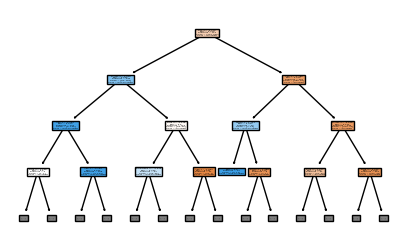


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro a

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans

df = pd.read_csv("titanic.csv")

# Drop unhelpful columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values using different strategies
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
mlr_pred = mlr_model.predict(X_test)

mlr_pred_class = np.round(mlr_pred).astype(int)
mlr_acc = accuracy_score(y_test, mlr_pred_class)

print("\nMultiple Linear Regression Classification Report:")
print(classification_report(y_test, mlr_pred_class))

# 2. Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
plt.figure(figsize=(5,3))
plot_tree(dt_model,feature_names=X.columns,class_names=['Survived','Not Survived'],filled=True,max_depth=3)
plt.show()
dt_acc = accuracy_score(y_test, dt_pred)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

# 3. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_pred))

# 4. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

# 5. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))

# 6. Clustering (unsupervised)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

from sklearn.metrics import adjusted_rand_score
clustering_score = adjusted_rand_score(y, cluster_labels)

print(f"\nKMeans Clustering (Adjusted Rand Index): {clustering_score:.4f}")

# Print model accuracy scores
print("\nModel Accuracy Scores:")
print(f"Multiple Linear Regression (rounded): {mlr_acc:.4f}")
print(f"Decision Tree: {dt_acc:.4f}")
print(f"K-Nearest Neighbors: {knn_acc:.4f}")
print(f"Naive Bayes: {nb_acc:.4f}")
print(f"Support Vector Machine: {svm_acc:.4f}")
